<center>
  <font size="+3">BobbleBot Controller Analysis Report<br><br></font>
  <font size="+2">Sensitivity to Mass Properties<br><br></font>
  <i>Mike Moore<br>
  <i>10/26/18<br>
  <img src="imgs/BobbleCAD.png" alt="BobbleBot CAD" style="height: 350px; width: 250px;"/>
</center>

## Introduction
This document outlines an analysis of BobbleBot controller performance under varying mass properties. The BobbleBot simulator was used to collect the data. The simulated BobbleBot was subjected to impulse forces applied at a fixed location and in the +/- X direction. The controller response is analyzed as the BobbleBot CG is varied along the x-direction. The result is a set of data that captures the controller's ability to maintain adequate balance control within a bounding volume of CG locations.
<center>
    <br>
  <img src="imgs/BobbleBotSimCg.png" alt="BobbleBot CG" style="height: 350px; width: 250px;"/>
</center>

## Loading BobbleBot Simulation Data


The BobbleBot simulator runs in Gazebo. Using the gazebo-ros packages, one can log data as the simulator runs and store it in a ros bag format. The simulation data can then be analyzed with Python using [Pandas](https://pandas.pydata.org/). This article discusses how to [load ROS bag files into Pandas](https://nimbus.unl.edu/2014/11/using-rosbag_pandas-to-analyze-rosbag-files/).

In [1]:
# Load anaylsis environment file. This file defines data directories
# and imports all needed Python packages for this notebook.
exec(open("env.py").read())

Loading configs from file : /home/mike/Work/SOE/BobbleBot/src/analysis_tools/notebooks/CgAnalysis/data/move_cg_x_longer_time/plots.yaml
Loading configs from file : /home/mike/Work/SOE/BobbleBot/src/analysis_tools/notebooks/CgAnalysis/data/move_cg_z/plots.yaml


### Print sim data in tabular form
All the sim data was loaded when the analysis env file was sourced. We can get the data for a run in tabular form like so.

In [6]:
n_rows = 10
df_x['cgx_0.0'].head(n_rows)

,bobble_bobble_balance_controller_bb_controller_status__ControlMode,bobble_bobble_balance_controller_bb_controller_status__DeltaT,bobble_bobble_balance_controller_bb_controller_status__DesiredTilt,bobble_bobble_balance_controller_bb_controller_status__DesiredTurnRate,bobble_bobble_balance_controller_bb_controller_status__DesiredVelocity,bobble_bobble_balance_controller_bb_controller_status__ForwardVelocity,bobble_bobble_balance_controller_bb_controller_status__Heading,bobble_bobble_balance_controller_bb_controller_status__HeadingEffort,bobble_bobble_balance_controller_bb_controller_status__LeftMotorEffortCmd,bobble_bobble_balance_controller_bb_controller_status__LeftMotorPosition,bobble_bobble_balance_controller_bb_controller_status__LeftMotorVelocity,bobble_bobble_balance_controller_bb_controller_status__RightMotorEffortCmd,bobble_bobble_balance_controller_bb_controller_status__RightMotorPosition,bobble_bobble_balance_controller_bb_controller_status__RightMotorVelocity,bobble_bobble_balance_controller_bb_controller_status__Tilt,bobble_bobble_balance_controller_bb_controller_status__TiltEffort,bobble_bobble_balance_controller_bb_controller_status__TiltRate,bobble_bobble_balance_controller_bb_controller_status__TurnRate,time
time,,,,,,,,,,,,,,,,,,,
0.00,2.0,0.0,0.138449,-0.0,0.0,-0.038605,179.979507,-0.006251,-0.000269,-1.154647,1.525257,0.012233,-2.948401,-5.944472,0.217398,0.005982,0.863985,1.574902,0.00
0.01,2.0,0.0,0.126162,-0.0,0.0,-0.010370,179.989868,-0.007950,-0.004543,-1.134518,2.415077,0.011358,-2.991847,-3.033169,0.214160,0.003407,-0.236150,1.105689,0.01
0.02,2.0,0.0,0.117796,-0.0,0.0,0.007458,-179.997726,-0.009292,-0.004241,-1.112692,1.996119,0.014343,-3.010364,-0.881537,0.203967,0.005051,0.401796,1.218475,0.02
0.03,2.0,0.0,0.105160,-0.0,0.0,0.032967,179.983551,0.002178,0.006391,-1.092400,2.060434,0.002034,-3.002324,2.187257,0.209771,0.004212,-0.189490,-1.563939,0.03
0.04,2.0,0.0,0.092970,-0.0,0.0,0.055661,179.991486,-0.001192,0.004303,-1.062989,3.666032,0.006687,-2.975527,3.088238,0.220110,0.005495,-0.067755,0.522878,0.04
0.05,2.0,0.0,0.076387,-0.0,0.0,0.085874,-179.986115,-0.009783,-0.007385,-1.017439,5.288469,0.012182,-2.933630,5.096525,0.219725,0.002399,-1.397656,2.105495,0.05
0.06,2.0,0.0,0.066812,-0.0,0.0,0.099326,-179.991470,-0.003831,-0.002051,-0.970067,4.293117,0.005612,-2.870773,7.264786,0.218060,0.001781,-1.674782,-0.242996,0.06
0.07,2.0,0.0,0.059900,-0.0,0.0,0.106452,-179.996628,0.000215,-0.000202,-0.928504,4.050649,-0.000632,-2.792685,8.260902,0.191422,-0.000417,-2.128428,-0.488276,0.07
0.08,2.0,0.0,0.059171,-0.0,0.0,0.100308,179.987808,0.006299,0.003515,-0.890485,3.604744,-0.009083,-2.712947,7.745516,0.162889,-0.002784,-2.493214,-1.419026,0.08


### Search for a column
Here's how to search for a column(s) in a data frame.


In [7]:
search_string = 'Velocity'
found_data = df_x['cgx_0.0'].filter(regex=search_string)
found_data.head()

,bobble_bobble_balance_controller_bb_controller_status__DesiredVelocity,bobble_bobble_balance_controller_bb_controller_status__ForwardVelocity,bobble_bobble_balance_controller_bb_controller_status__LeftMotorVelocity,bobble_bobble_balance_controller_bb_controller_status__RightMotorVelocity
time,,,,
0.00,0.0,-0.038605,1.525257,-5.944472
0.01,0.0,-0.010370,2.415077,-3.033169
0.02,0.0,0.007458,1.996119,-0.881537
0.03,0.0,0.032967,2.060434,2.187257
0.04,0.0,0.055661,3.666032,3.088238


## CG Shift X

### Tilt Plot

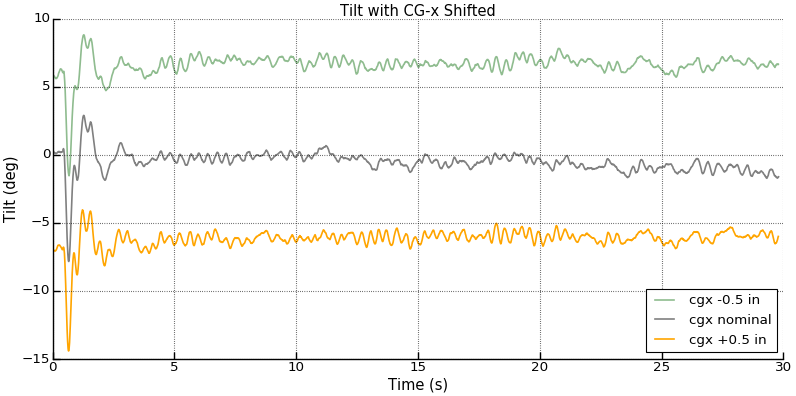

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
# Make the plot
fig = plt.figure(figsize=(20, 10), dpi=40)
ax1 = fig.add_subplot(111)
coplot_var_for_runs(ax1, df_x, pc_x['measured_tilt'])
fig.tight_layout()
sns.despine()
plt.savefig('TiltsX.png', bbox_inches='tight')

### Velocity Plot

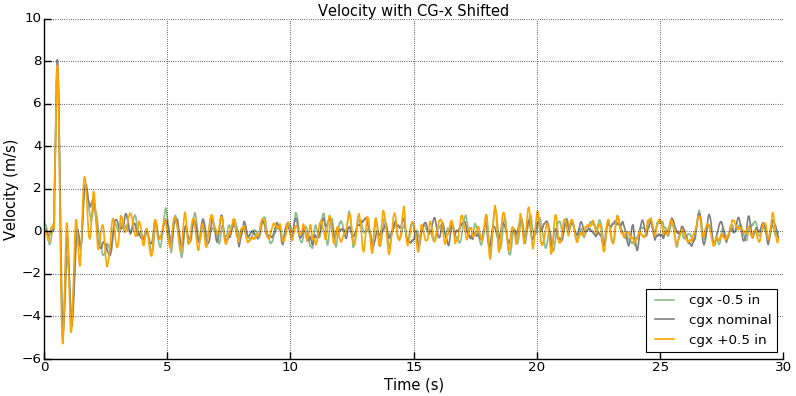

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
# Make the plot
fig = plt.figure(figsize=(20, 10), dpi=40)
ax1 = fig.add_subplot(111)
coplot_var_for_runs(ax1, df_x, pc_x['velocity'])
fig.tight_layout()
sns.despine()
plt.savefig('VelocitiesX.png', bbox_inches='tight')

## CG Shift Z

### Desired Tilt vs Actual (nominal z cg 0.180 m)

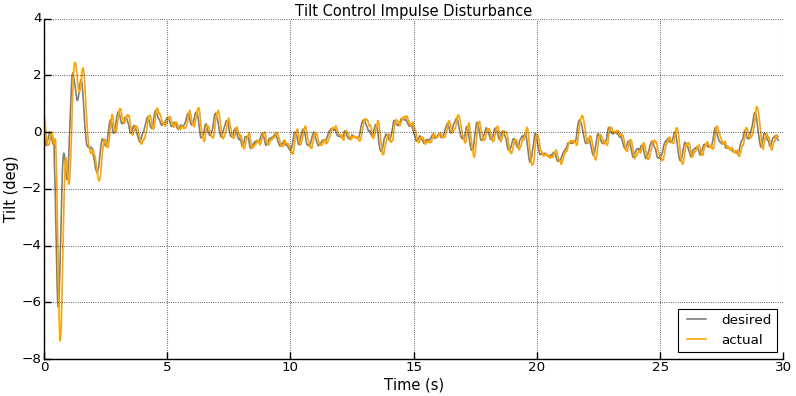

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
# Make the plot
fig = plt.figure(figsize=(20, 10), dpi=40)
ax1 = fig.add_subplot(111)
desired_vs_actual_for_runs(ax1, df_z, pc_z['desired_tilt_vs_actual'])
fig.tight_layout()
sns.despine()
plt.savefig('DesiredTiltVsActualZ.png', bbox_inches='tight')

### Desired Velocity vs Actual (nominal z cg 0.180 m)

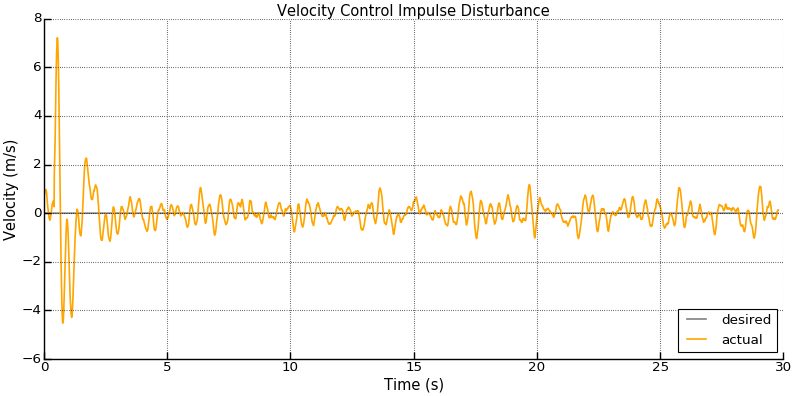

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
# Make the plot
fig = plt.figure(figsize=(20, 10), dpi=40)
ax1 = fig.add_subplot(111)
desired_vs_actual_for_runs(ax1, df_z, pc_z['desired_velocity_vs_actual'])
fig.tight_layout()
sns.despine()
plt.savefig('DesiredVelocityVsActualZ.png', bbox_inches='tight')

### Tilt Plot

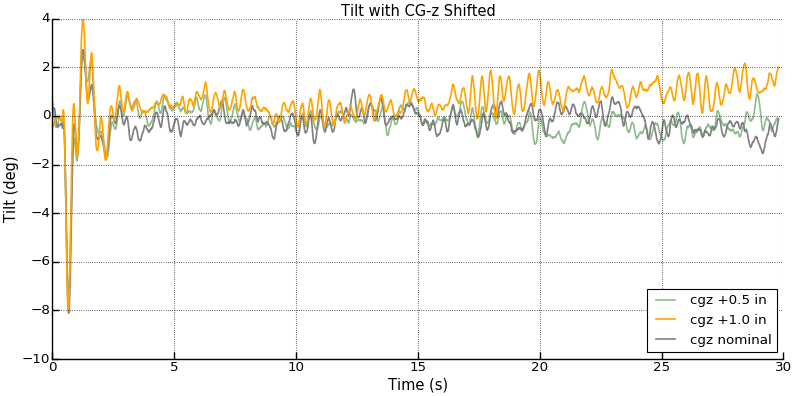

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
# Make the plot
fig = plt.figure(figsize=(20, 10), dpi=40)
ax1 = fig.add_subplot(111)
coplot_var_for_runs(ax1, df_z, pc_z['measured_tilt'])
fig.tight_layout()
sns.despine()
plt.savefig('TiltsZ.png', bbox_inches='tight')

### Velocity Plot

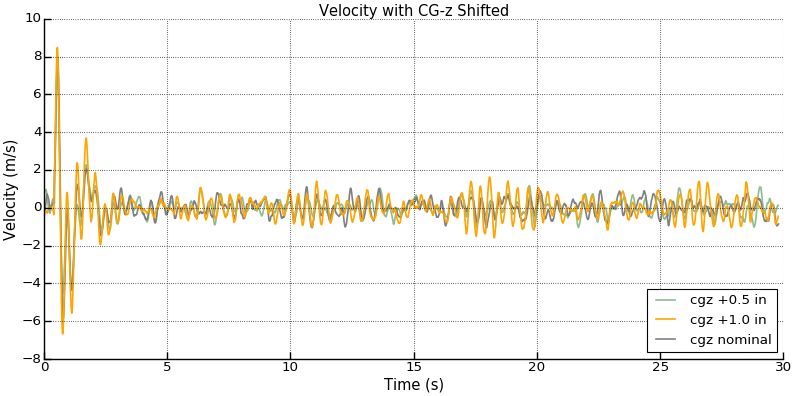

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
# Make the plot
fig = plt.figure(figsize=(20, 10), dpi=40)
ax1 = fig.add_subplot(111)
coplot_var_for_runs(ax1, df_z, pc_z['velocity'])
fig.tight_layout()
sns.despine()
plt.savefig('VelocitiesZ.png', bbox_inches='tight')